In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
from rvi_sampling.utils.stochastic_processes import create_SIR 
import numpy as np
from collections import namedtuple
import torch.nn as nn
import torch
from rvi_sampling.stochastic_processes.base import PyTorchWrap
from rvi_sampling.samplers import RVISampler
from pg_methods.networks import MLP_factory
from pg_methods.policies import MultinomialPolicy
from pg_methods.baselines import MovingAverageBaseline
from pg_methods.objectives import PolicyGradientObjective
A = namedtuple('bla', 'sir_seed')

In [3]:
sir, _ = create_SIR(A(0))

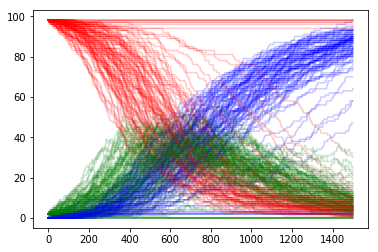

In [4]:
for i in range(100):
    trajectory = sir.simulate()
    plt.plot(trajectory[:, 0], label='Susceptibles', color='r', alpha=0.2)
    plt.plot(trajectory[:, 1], label='infecteds', color='g', alpha=0.2)
    plt.plot(sir.population_size - trajectory[:, 0] - trajectory[:, 1], label='recoverds', color='b', alpha=0.2)


In [5]:
# create a policy for the RVI sampler
fn_approximator = MLP_factory(sir.state_space+int(1),
                              hidden_sizes=[16, 16],
                              output_size=sir.action_space,
                              hidden_non_linearity=nn.ReLU)

policy = MultinomialPolicy(fn_approximator)
policy_optimizer = torch.optim.RMSprop(fn_approximator.parameters(),lr=0.001)
baseline = MovingAverageBaseline(0.99)
rvi =  RVISampler(policy,
                  policy_optimizer,
                  baseline=baseline,
                  objective=PolicyGradientObjective(entropy=3),
                  feed_time=True,
                  seed=0)

In [6]:
rvi.solve(PyTorchWrap(sir), 1000, verbose=True)

/home/ml/zahmed8/dev/better-sampling/rvi_sampling/stochastic_processes/SIR.py:169: RuntimeWarning: divide by zero encountered in log
  step_log_probs = np.log(step_probs)


AssertionError: 